Zadatak je da se obrade i analiziraju otvoreni podaci (open data) ankete koju je sprovela kompanija Stack Overflow u 2019 godini

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import matplotlib
import numpy

### Zadatak 1. 
Učitati csv fajl u kome se nalazi tabela (~200 MB) i odrediti koliko postoji unosa, a koliko podataka po unosu

#### Rešenje

Pogledajmo zaglavlje:

In [2]:
!head -n1 2019/survey_results_public.csv

Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase


Vidimo da će read_csv ovaj fajl pročitati bez problema:

In [3]:
all_df = pandas.read_csv('2019/survey_results_public.csv')
# all_df.info()
all_df.head()

Respondent                                         MainBranch Hobbyist  \
0           1             I am a student who is learning to code      Yes   
1           2             I am a student who is learning to code       No   
2           3  I am not primarily a developer, but I write co...      Yes   
3           4                     I am a developer by profession       No   
4           5                     I am a developer by profession      Yes   

                  OpenSourcer  \
0                       Never   
1     Less than once per year   
2                       Never   
3                       Never   
4  Once a month or more often   

                                          OpenSource  \
0  The quality of OSS and closed source software ...   
1  The quality of OSS and closed source software ...   
2  The quality of OSS and closed source software ...   
3  The quality of OSS and closed source software ...   
4  OSS is, on average, of HIGHER quality than pro...   

                               Employment                 Country  \
0  Not employed, and not looking for work          United Kingdom   
1      Not employed, but looking for work  Bosnia and Herzegovina   
2                      Employed full-time                Thailand   
3                      Employed full-time           United States   
4                      Employed full-time                 Ukraine   

          Student                                            EdLevel  \
0              No                          Primary/elementary school   
1  Yes, full-time  Secondary school (e.g. American high school, G...   
2              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
3              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   

                                      UndergradMajor  ...  \
0                                                NaN  ...   
1                                                NaN  ...   
2                      Web development or web design  ...   
3  Computer science, computer engineering, or sof...  ...   
4  Computer science, computer engineering, or sof...  ...   

                             WelcomeChange  \
0  Just as welcome now as I felt last year   
1  Just as welcome now as I felt last year   
2  Just as welcome now as I felt last year   
3  Just as welcome now as I felt last year   
4  Just as welcome now as I felt last year   

                                        SONewContent   Age Gender Trans  \
0  Tech articles written by other developers;Indu...  14.0    Man    No   
1  Tech articles written by other developers;Indu...  19.0    Man    No   
2  Tech meetups or events in your area;Courses on...  28.0    Man    No   
3  Tech articles written by other developers;Indu...  22.0    Man    No   
4  Tech meetups or events in your area;Courses on...  30.0    Man    No   

                 Sexuality                                 Ethnicity  \
0  Straight / Heterosexual                                       NaN   
1  Straight / Heterosexual                                       NaN   
2  Straight / Heterosexual                                       NaN   
3  Straight / Heterosexual              White or of European descent   
4  Straight / Heterosexual  White or of European descent;Multiracial   

  Dependents           SurveyLength                  SurveyEase  
0         No  Appropriate in length  Neither easy nor difficult  
1         No  Appropriate in length  Neither easy nor difficult  
2        Yes  Appropriate in length  Neither easy nor difficult  
3         No  Appropriate in length                        Easy  
4         No  Appropriate in length                        Easy  

[5 rows x 85 columns]

Kolike su dimenzije ove tabele?

In [4]:
all_df.shape
#all_df.index.size
#all_df.shape[0]

(88883, 85)

### Zadatak 2. 

Obraditi godine starosti ispitanika

#### Rešenje

In [5]:
all_df['Age'].head()

0    14.0
1    19.0
2    28.0
3    22.0
4    30.0
Name: Age, dtype: float64

In [6]:
def gc (a,z):
    return float(all_df[ ((all_df['Age'] >= a) & (all_df['Age'] < z)) ].shape[0]) / all_df.shape[0]*100

age = pandas.Series()
age['od 10 do 20'] = gc(10,20)
age['od 20 do 30'] = gc(20,30)
age['od 30 do 40'] = gc(30,40)
age

od 10 do 20     5.461112
od 20 do 30    43.434628
od 30 do 40    27.802842
dtype: float64

Iz ovoga zaključujemo da je više od $\frac{3}{4}$ ispitanika uzrasti između 10 i 40 godina

In [7]:
age.sum()

76.69858128100987

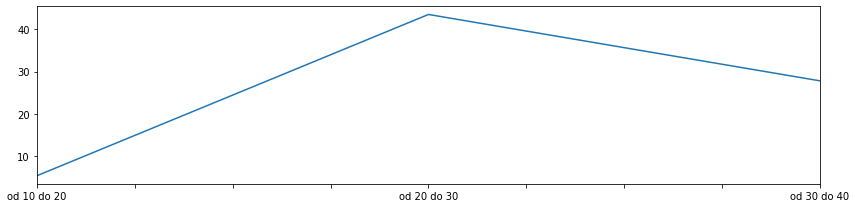

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

age.plot(ax=axes, kind='line')

fig.tight_layout()

### Zadatak 3. 
Obraditi koji procenat ispitanika se bavi programiranjem iz hobija

In [9]:
all_df['Hobbyist'].head()

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: Hobbyist, dtype: object

Ako bismo želeli da pogledamo razultate za određenu temlju morali bismo da postavimo uslov poput ovoga

In [10]:
all_df[all_df['Country'] == 'Serbia'].Hobbyist.value_counts()

Yes    304
No      98
Name: Hobbyist, dtype: int64

Ali posto mi računamo za sve u tom slučaju nije potreban dodatni uslov

In [11]:
hobbyist = all_df['Hobbyist'].value_counts()
hobbyist.apply(lambda x: (float(x)/all_df.shape[0])*100)

Yes    80.169436
No     19.830564
Name: Hobbyist, dtype: float64

Iz ovoga zaključujemo da $\frac{4}{5}$ ispitanika programira iz hobija

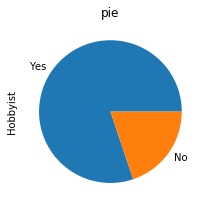

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

hobbyist.plot(ax=axes, kind='pie', title="pie")

fig.tight_layout()

### Zadatak 4. 

Odrediti u kojim programskim jeziku zna da radi najveći procenat ispitanika

#### Rešenje

Prvo je potrebno pretvoriti string u kome su jezici razdvojeni znakom ';' u listu

In [13]:
all_df.LanguageWorkedWith.head()

0                HTML/CSS;Java;JavaScript;Python
1                            C++;HTML/CSS;Python
2                                       HTML/CSS
3                            C;C++;C#;Python;SQL
4    C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
Name: LanguageWorkedWith, dtype: object

In [14]:
all_df['LanguageWorkedWith'] = all_df['LanguageWorkedWith'].apply(lambda x: str(x).split(';'))

In [15]:
all_df.LanguageWorkedWith.head()

0                 [HTML/CSS, Java, JavaScript, Python]
1                              [C++, HTML/CSS, Python]
2                                           [HTML/CSS]
3                            [C, C++, C#, Python, SQL]
4    [C++, HTML/CSS, Java, JavaScript, Python, SQL,...
Name: LanguageWorkedWith, dtype: object

In [16]:
work_lan_s = pandas.Series()
for row in all_df.LanguageWorkedWith.values:
    for language in row:
        work_lan_s[language] = work_lan_s[language]+1 if language in work_lan_s.index else 1

In [17]:
work_lan_s = work_lan_s.sort_values(ascending=False)
work_lan_s.head(10)

JavaScript               59219
HTML/CSS                 55466
SQL                      47544
Python                   36443
Java                     35917
Bash/Shell/PowerShell    31991
C#                       27097
PHP                      23030
C++                      20524
TypeScript               18523
dtype: int64

In [18]:
all_df.shape[0]

88883

In [19]:
work_lan_s = work_lan_s.apply(lambda x: (float(x)/all_df.shape[0])*100)

In [20]:
work_lan_s.head()

JavaScript    66.625789
HTML/CSS      62.403384
SQL           53.490544
Python        41.001091
Java          40.409302
dtype: float64

Očekivano, usled sveprisutnosti interneta JavaScript i HTML/CSS zauzimaju prva 2 meste gde JavaScript koristi $\frac{2}{3}$ ispitanika

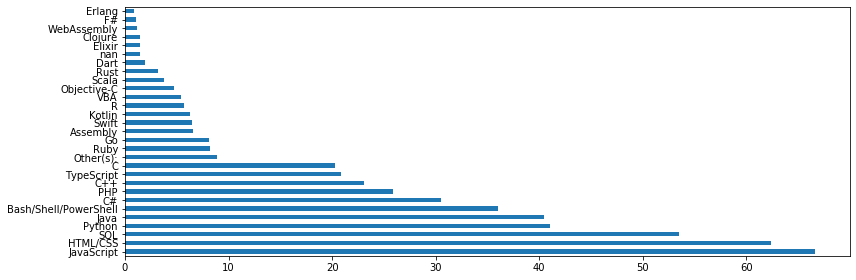

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

work_lan_s.plot(ax=axes, kind='barh')

fig.tight_layout()

### Zadatak 5. 

Odrediti u kojim programskim jeziku zna da radi najveći broj ispitanika u zavisnosti od tipa posla kojim se bave

#### Rešenje

Isti problem imao kao i u prethotnom zadatku, moramo pretvoriti string u listu

In [22]:
all_df['DevType'].head()

0                                                  NaN
1    Developer, desktop or enterprise applications;...
2    Designer;Developer, back-end;Developer, front-...
3                                Developer, full-stack
4    Academic researcher;Developer, desktop or ente...
Name: DevType, dtype: object

In [23]:
all_df['DevType'] = all_df['DevType'].apply(lambda x: str(x).split(';'))

In [24]:
temp = all_df[['LanguageWorkedWith','DevType']]
temp

LanguageWorkedWith  \
0                   [HTML/CSS, Java, JavaScript, Python]   
1                                [C++, HTML/CSS, Python]   
2                                             [HTML/CSS]   
3                              [C, C++, C#, Python, SQL]   
4      [C++, HTML/CSS, Java, JavaScript, Python, SQL,...   
...                                                  ...   
88878                  [HTML/CSS, JavaScript, Other(s):]   
88879                                              [nan]   
88880                                              [nan]   
88881                                              [nan]   
88882  [Bash/Shell/PowerShell, HTML/CSS, Java, JavaSc...   

                                                 DevType  
0                                                  [nan]  
1      [Developer, desktop or enterprise applications...  
2      [Designer, Developer, back-end, Developer, fro...  
3                                [Developer, full-stack]  
4      [Academic researcher, Developer, desktop or en...  
...                                                  ...  
88878                                              [nan]  
88879                                              [nan]  
88880                                              [nan]  
88881                                              [nan]  
88882                                              [nan]  

[88883 rows x 2 columns]

In [25]:
devcounter = pandas.DataFrame(columns=['Count','DevType','LanguageWorkedWith'])
devcounter = devcounter.set_index(['DevType','LanguageWorkedWith'])
for r in temp.values:
    for d in r[1]:
        for l in r[0]:
            devcounter.at[(d,l),'Count'] = devcounter.at[(d,l),'Count']+1 if (d,l) in devcounter.index else 1

Odavde možemo videti da akademski istraživači (Academic researcher) i istraživači podataka (Data scientist or machine learning specialist) najviše koriste Python i to za akademske istraživače 3621 ispitanik, a za istraživače podataka 5125 ispitanik, gde ako izuzmemo JavaScript (o kome se može raspljavati da li je jezik opšte namene) sledeći programski jezik opšte name je Java sa 2506 ispitanika za akademske istraživače i samo 2453 ispitanika za istaživače podataka (što je duplo manje)

Očekivano najveći broj administratora baza podataka (Database administrator) radi sa SQL-om

Dok najviše srudenata (Student) zna HTML/CSS (8122 ispitanik), JavaScript (7574) a na trećem mestu gotovo identičan broj studenata ispitanika zna Java (6482) i Python (6481)

[Klikni ovde](rezultat_zad5.html) da vidiš kompletnu DataFrame tabelu

In [26]:
print(devcounter.sort_values(by=['DevType','Count'],ascending = [True, False]))

# with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(devcounter.sort_values(by=['DevType','Count'],ascending = [True, False]))

                                         Count
DevType             LanguageWorkedWith        
Academic researcher Python              3621.0
                    HTML/CSS            3313.0
                    JavaScript          3217.0
                    SQL                 2820.0
                    Java                2506.0
...                                        ...
nan                 WebAssembly          129.0
                    Clojure               80.0
                    F#                    76.0
                    Elixir                72.0
                    Erlang                59.0

[725 rows x 1 columns]


### Zadatak 6. 

Odrediti u kojim programskim jeziku želi da radi najveći procenat ispitanika

#### Rešenje

Na početku, ponovićemo isti postupak i u ovom zadatku:

In [27]:
all_df.LanguageDesireNextYear.head()

0    C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL
1                        C++;HTML/CSS;JavaScript;SQL
2                                    Elixir;HTML/CSS
3                                C;C#;JavaScript;SQL
4           HTML/CSS;Java;JavaScript;SQL;WebAssembly
Name: LanguageDesireNextYear, dtype: object

In [28]:
all_df['LanguageDesireNextYear'] = all_df['LanguageDesireNextYear'].apply(lambda x: str(x).split(';'))

In [29]:
counter = pandas.Series()
for row in all_df.LanguageDesireNextYear.values:
    for language in row:
        counter[language] = counter[language]+1 if language in counter.index else 1

counter = counter.sort_values(ascending=False)

counter = counter.apply(lambda x: (float(x)/all_df.shape[0])*100)

counter.head()

JavaScript    50.334710
Python        45.009732
HTML/CSS      41.228356
SQL           37.764252
TypeScript    26.686768
dtype: float64

Na osnovu ovih rezultata možemo da očekujemo porast korisnika Python-a jer je 45% ispitanika odgovorilo da bi želelo da koristi python u sledećoj godini, sa druge strane možemo da značjan pad možemo da očekujemo kad je Java u pitanju jer je je 40% ispitanika reklo da je ove godine radilo u javi ali samo ~20% je odgovorilo da i naredne godine želi da radi u java programskom jeziku

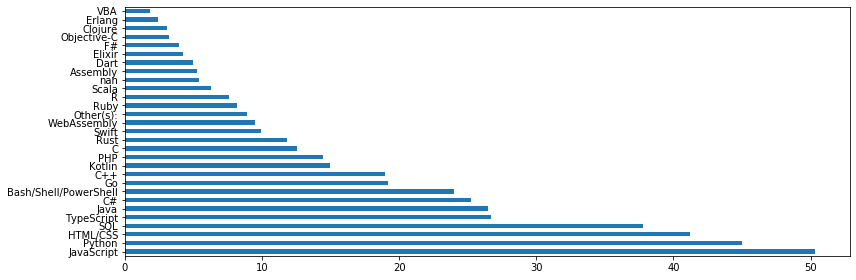

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

counter.plot(ax=axes, kind='barh')

fig.tight_layout()

### Zadatak 7. 
Odrediti sa kojim programskim jezicima želi da radi najveći broj ispitanika u zavisnosti od tipa posla kojim se bave

In [31]:
temp = all_df[['LanguageDesireNextYear','DevType']]

devcounter2 = pandas.DataFrame(columns=['Count','DevType','LanguageDesireNextYear'])
devcounter2 = devcounter2.set_index(['DevType','LanguageDesireNextYear'])
for r in temp.values:
    for d in r[1]:
        for l in r[0]:
            devcounter2.at[(d,l),'Count'] = devcounter2.at[(d,l),'Count']+1 if (d,l) in devcounter2.index else 1


Kada su očekivanja po oblastima, očekivano u akademskim i istraživačkim krugovima naredne godine najveći broj ispitanika želi da radi u Python-u (Academic researcher, Data scientist or machine learning specialist, Engineer - data, Engineer - site reliability, Scientist,  Student)

Zanimljivo da je 1302 Engineer - site reliability ispitanika reklo da u narednoj godini želi da radi u Go (Golang) programskom jeziku, dok 902 ispitanika iz iste oblasti je ove godine radilo u njemu

[Klikni ovde](rezultat_zad7.html) da vidiš kompletnu DataFrame tabelu

In [32]:
print(devcounter2.sort_values(by=['DevType','Count'],ascending = [True, False]))

# with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(devcounter2.sort_values(by=['DevType','Count'],ascending = [True, False]))

                                             Count
DevType             LanguageDesireNextYear        
Academic researcher Python                  3644.0
                    JavaScript              2430.0
                    SQL                     2098.0
                    HTML/CSS                2078.0
                    C++                     1846.0
...                                            ...
nan                 VBA                      234.0
                    F#                       221.0
                    Elixir                   209.0
                    Clojure                  175.0
                    Erlang                   137.0

[725 rows x 1 columns]


### Zadatak 8. 
Obraditi koji procenat ispitanika doprinosi Open Source zajednici

In [33]:
all_df['OpenSourcer'].head()

0                         Never
1       Less than once per year
2                         Never
3                         Never
4    Once a month or more often
Name: OpenSourcer, dtype: object

In [34]:
OpenSourcer = all_df['OpenSourcer'].value_counts().apply(lambda x: (float(x)/all_df.shape[0])*100)
OpenSourcer.name = ''
OpenSourcer

Never                                                 36.334282
Less than once per year                               28.095361
Less than once a month but more than once per year    23.132658
Once a month or more often                            12.437699
Name: , dtype: float64

To što ~63% ispitanika na bilo koji načim doprinose Open Source zajednici je dobar pokazatelj da će ona nastaviti svoj trend rasta i u narednoj godini

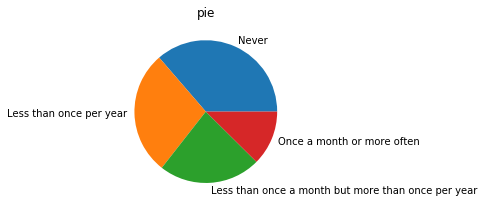

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

OpenSourcer.plot(ax=axes, kind='pie', title="pie")

fig.tight_layout()

### Zadatak 9.
Odrediti odnos muškaraca i žena u anketi

In [36]:
all_df['Gender'].head()

0    Man
1    Man
2    Man
3    Man
4    Man
Name: Gender, dtype: object

In [37]:
gender = pandas.Series()
gender['Woman'] = all_df[ all_df['Gender'] == 'Woman' ].shape[0]
gender['Man'] = all_df[ all_df['Gender'] == 'Man' ].shape[0]
gender = gender.apply(lambda x: (float(x)/gender.sum())*100)
gender

Woman     7.528809
Man      92.471191
dtype: float64

Procenat žena među ispitanicima je jako mali, što je jasni pokazatelj da je opravdano i nužno ulagati napor da se popravi ovogodišnja situacija 

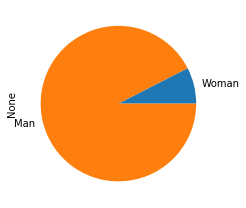

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

gender.plot(ax=axes, kind='pie')

fig.tight_layout()

### Zadatak 9.
Odrediti odnos muškaraca i žena u anketi

In [39]:
srb_gender = all_df[all_df['Country'] == 'Serbia'].Gender.value_counts().loc[['Man','Woman']]
srb_gender

Man      339
Woman     48
Name: Gender, dtype: int64

In [40]:
srb_gender = srb_gender.apply(lambda x: (float(x)/srb_gender.sum())*100)
srb_gender

Man      87.596899
Woman    12.403101
Name: Gender, dtype: float64

U Srbiji je statistika nešto bolja, ali treba uzeti u obzir i to da je obim podataka za srbiju mnogo manji (\~400 ispitanika) od globalne statistike (~88000 ispitanika)

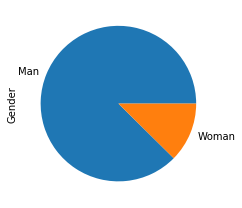

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

srb_gender.plot(ax=axes, kind='pie')

fig.tight_layout()